In [1]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pandas as pd

In [2]:
data = pd.read_csv("diamonds.csv")

In [3]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
X= data.drop(columns=['cut','color','clarity','x','y','z','price'])
X
Y=data.copy()
col = [i for i in range(len(data.columns))]
col.pop(6)
Y.drop(Y.columns[col],axis=1,inplace=True)
Y

,price
0,326
1,326
2,327
3,334
4,335
...,...
53935,2757
53936,2757
53937,2757
53938,2757


In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)

In [6]:
mr =LinearRegression()
mr.fit(X_train,Y_train)

LinearRegression()

In [7]:
mr.predict(X_test)

array([[-350.84546173],
       [2530.70339469],
       [1013.98650672],
       ...,
       [9411.34834876],
       [3293.44709021],
       [1116.25992983]])

In [8]:
corr_matrix = X.corr()
print(corr_matrix)

          carat     depth     table
carat  1.000000  0.028224  0.181618
depth  0.028224  1.000000 -0.295779
table  0.181618 -0.295779  1.000000


In [17]:
var = X.columns[:]
var

Index(['carat', 'depth', 'table'], dtype='object')

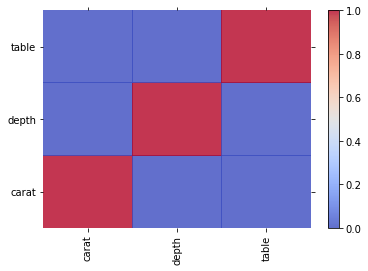

In [18]:
import numpy as np
import matplotlib as mpl
def visualize_correlation_matrix(dat = X, hurdle = 0.0):
   
    R = np.corrcoef(dat, rowvar=0)
    R[np.where(np.abs(R)<hurdle)] = 0.0
    heatmap = plt.pcolor(R, cmap=mpl.cm.coolwarm, alpha=0.8)
    heatmap.axes.set_frame_on(False)
    heatmap.axes.set_yticks(np.arange(R.shape[0]) + 0.5, minor=False)
    heatmap.axes.set_xticks(np.arange(R.shape[1]) + 0.5, minor=False)
    heatmap.axes.set_xticklabels(var, minor=False)
    plt.xticks(rotation=90)
    heatmap.axes.set_yticklabels(var, minor=False)
    plt.tick_params(axis='both', which='both', bottom='off',top='off', left = 'off', right = 'off')
    plt.colorbar()
    plt.show()
visualize_correlation_matrix(dat=X, hurdle=0.5)

In [23]:
print(mr.score(X_test,Y_test))
print(mr.coef_)
print(mr.intercept_)

0.8532031629541936
[[7868.16437509 -148.71363682 -105.92566843]]
[12927.74936695]


<h1>Own Cor-relation Matrix Function<h1>